In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('complaints_2018_final.csv')

df.cmplnt_fr_dt = df.cmplnt_fr_dt.apply(lambda x: pd.to_datetime(x))

In [3]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,98436.0,1.247863e+08,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,4438.0,1.158795e+07,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,77354.0,4.355518e+07,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,97932.0,6.933617e+07,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179


In [3]:
df = df[df.boro_nm != 'unknown']

In [5]:
df.cmplnt_num.nunique()

905671

In [6]:
df.shape

(916841, 30)

In [7]:
df.isnull().sum()

cmplnt_num                     0
cmplnt_fr_dt                   0
cmplnt_fr_tm                   0
rpt_dt                         0
ky_cd                          0
ofns_desc                      0
pd_cd                          0
pd_desc                        0
law_cat_cd                     0
boro_nm                        0
prem_typ_desc                  0
susp_age_group                 0
susp_race                      0
susp_sex                       0
latitude                       0
longitude                      0
patrol_boro                    0
vic_age_group                  0
vic_race                       0
vic_sex                        0
population                     0
area                           0
county                         0
zipcodes                       0
adjusted_gross_income_(agi)    0
avg_agi                        0
total_income_amount            0
avg_total_income               0
taxable_income_amount          0
avg_taxable_income             0
dtype: int

In [8]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

In [9]:
df.county.unique()

array(['New York', 'Queens', 'Bronx', 'Kings', 'Richmond'], dtype=object)

In [10]:
#Linh's sort function:
#---
def sort_crime(column):
    column = str(column)
    if 'ASSAULT' in column:
        return 'ASSAULT'
    elif 'MURDER' in column or 'HOMICIDE' in column:
        return 'MURDER'
    elif 'HARRASSMENT' in column:
        return 'HARRASSMENT'
    elif 'SEX CRIMES' in column:
        return "SEX CRIMES"
    elif 'PETIT LARCENY' in column:
        return 'PETIT LARCENY'
    elif 'GRAND LARCENY' in column:
        return 'GRAND LARCENY'
    elif 'FELONY ASSAULT' in column:
        return 'FELONY ASSAULT'
    elif 'BURGLAR' in column:
        return 'BURGLAR'
    elif 'KIDNAPPING' in column:
        return 'KIDNAPPING'
    elif 'FRAUD' in column:
        return 'FRAUD'
    elif 'GAMBLING' in column:
        return'GAMBLING'
    elif 'MOTOR' in column or 'TRAFFIC' in column:
        return 'MOTOR VEHICLE CRIME'
    elif 'VEHICLE' in column:
        return 'MOTOR VEHICLE CRIME'
    elif 'DRIVING' in column:
        return 'MOTOR VEHICLE CRIME'
    elif 'CRIMINAL MISCHIEF' in column:
        return 'CRIMINAL MISCHIEF'
    elif 'DRUGS' in column:
        return 'DRUGS'
    elif 'THEF' in column or 'STOLEN' in column:
        return 'THEFT'
    elif 'LAW' in column:
        return 'UNCLASSIFIED LAW'
    elif 'TRESPASS' in column:
        return "TRESPASS"
    elif 'OFF' in column and 'THEF'not in column:
        return 'OFFENSE'
    elif 'ARSON' in column:
        return 'ARSON'
    elif 'FORGERY' in column:
        return 'FORGERY'
    elif 'WEAP' in column:
        return 'WEAPON'
    elif 'CHILD' in column or 'ABORTION' in column:
        return 'CHILD RELATED'
    elif 'JOST' in column or 'CONDUCT' in column:
        return "DISORDERLY CONDUCT"
    else:
        return column

In [11]:
df['crime_type'] = df['ofns_desc'].map(sort_crime)
df['crime_type'][:10]

0                   petit_larceny
1                   petit_larceny
2                   petit_larceny
3                     theft_fraud
4                      sex_crimes
5                     theft_fraud
6                  felony_assault
7                           arson
8    off_agnst_pub_ord_sensblty_&
9                   petit_larceny
Name: crime_type, dtype: object

In [12]:
def crime_value(column):
    if column == 'MISDEMEANOR':
        return 2
    elif column == 'VIOLATION':
        return 1
    elif column == 'FELONY':
        return 3
df['crime_num'] = df['law_cat_cd'].map(crime_value)
df['crime_num']

0         None
1         None
2         None
3         None
4         None
          ... 
917451    None
917452    None
917453    None
917454    None
917455    None
Name: crime_num, Length: 916841, dtype: object

In [13]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,crime_type,crime_num
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,petit_larceny,None
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,petit_larceny,None
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,petit_larceny,None
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,theft_fraud,None
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,sex_crimes,None


## EDA - correlation to neighborhood
---

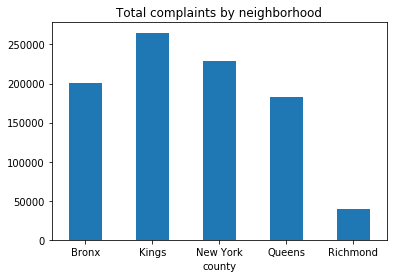

In [14]:
complaints_by_neighborhood = df.groupby('county').cmplnt_num.count()
complaints_by_neighborhood.plot.bar(rot = 0)
plt.title('Total complaints by neighborhood');

Text(0.5, 1.0, 'Total Population of each Area')

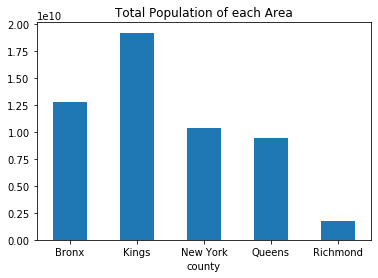

In [15]:
neighborhood_pop = df.groupby('county').population.sum()
neighborhood_pop.plot.bar(rot = 0)
plt.title('Total Population of each Area')

In [16]:
neighborhood_pop

county
Bronx       1.283351e+10
Kings       1.922689e+10
New York    1.038904e+10
Queens      9.423313e+09
Richmond    1.760492e+09
Name: population, dtype: float64

In [17]:
broken_down_complaints = df.groupby(['ofns_desc', 'boro_nm']).cmplnt_num.count()

In [18]:
complaints_df = broken_down_complaints.unstack()

complaints_df

boro_nm,bronx,brooklyn,manhattan,queens,staten_island
ofns_desc,,,,,
abortion,1.0,NaN,NaN,NaN,NaN
administrative_code,682.0,585.0,271.0,498.0,79.0
agriculture_&_mrkts_lawunclassified,70.0,68.0,57.0,55.0,20.0
alcoholic_beverage_control_law,51.0,130.0,16.0,18.0,1.0
anticipatory_offenses,2.0,3.0,4.0,3.0,NaN
...,...,...,...,...,...
theft_of_services,143.0,104.0,487.0,82.0,NaN
unauthorized_use_of_a_vehicle,450.0,1072.0,359.0,1190.0,156.0
unknown,4.0,4.0,12.0,1.0,1.0


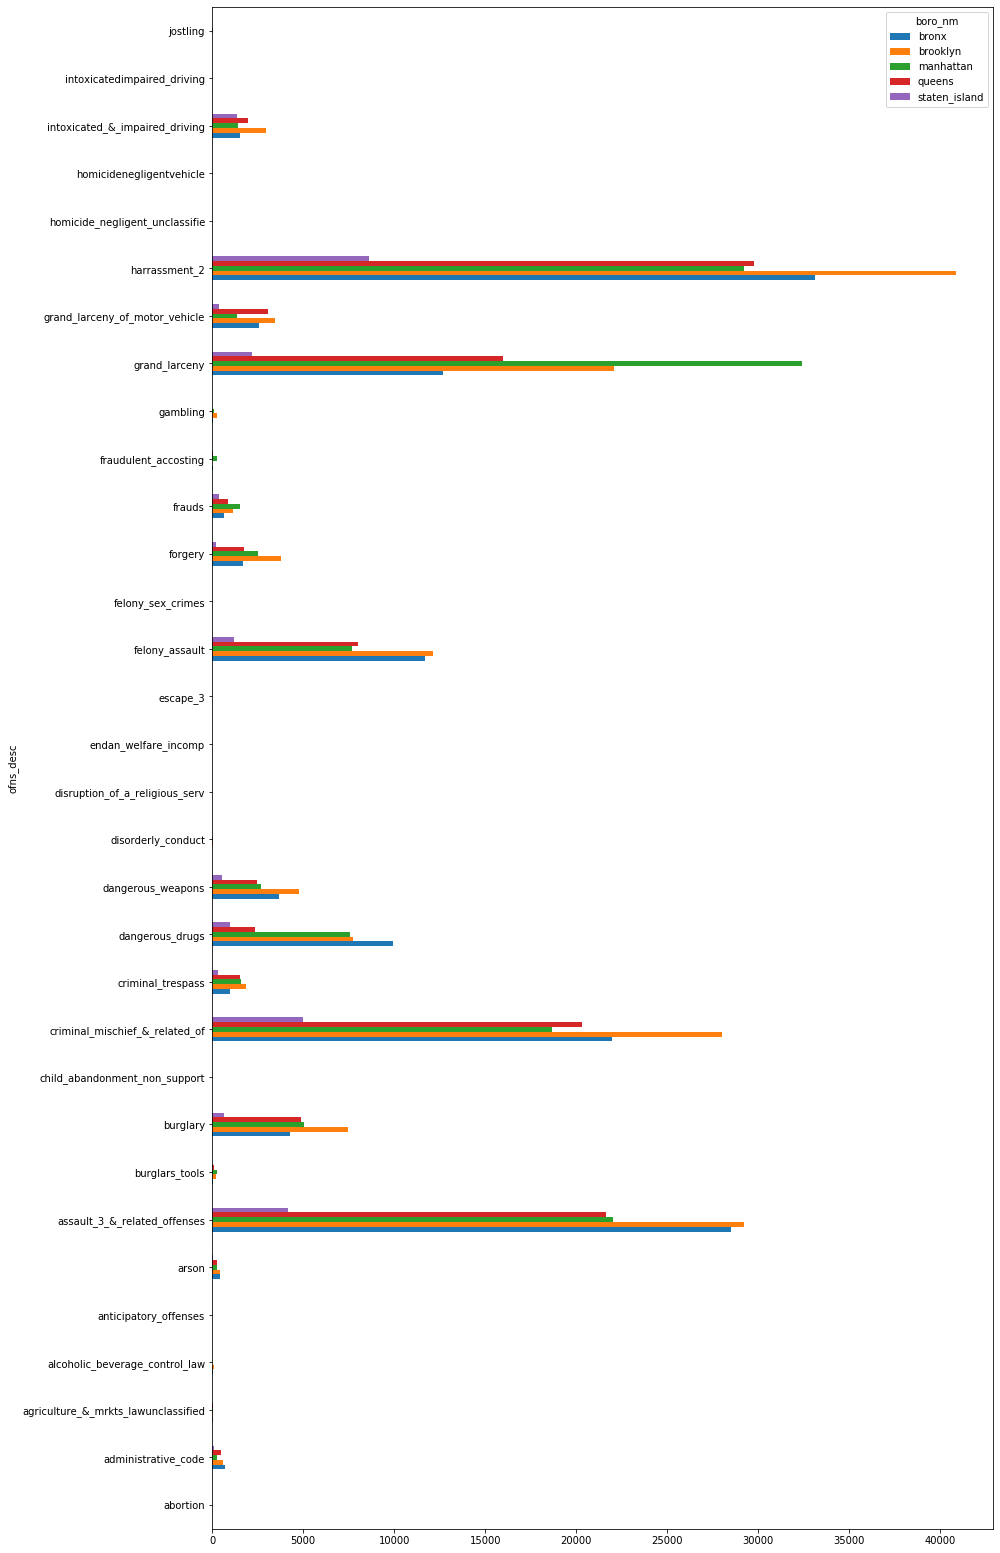

In [19]:
complaints_df[:len(complaints_df) // 2].plot.barh(figsize = (14,28), rot = 0)

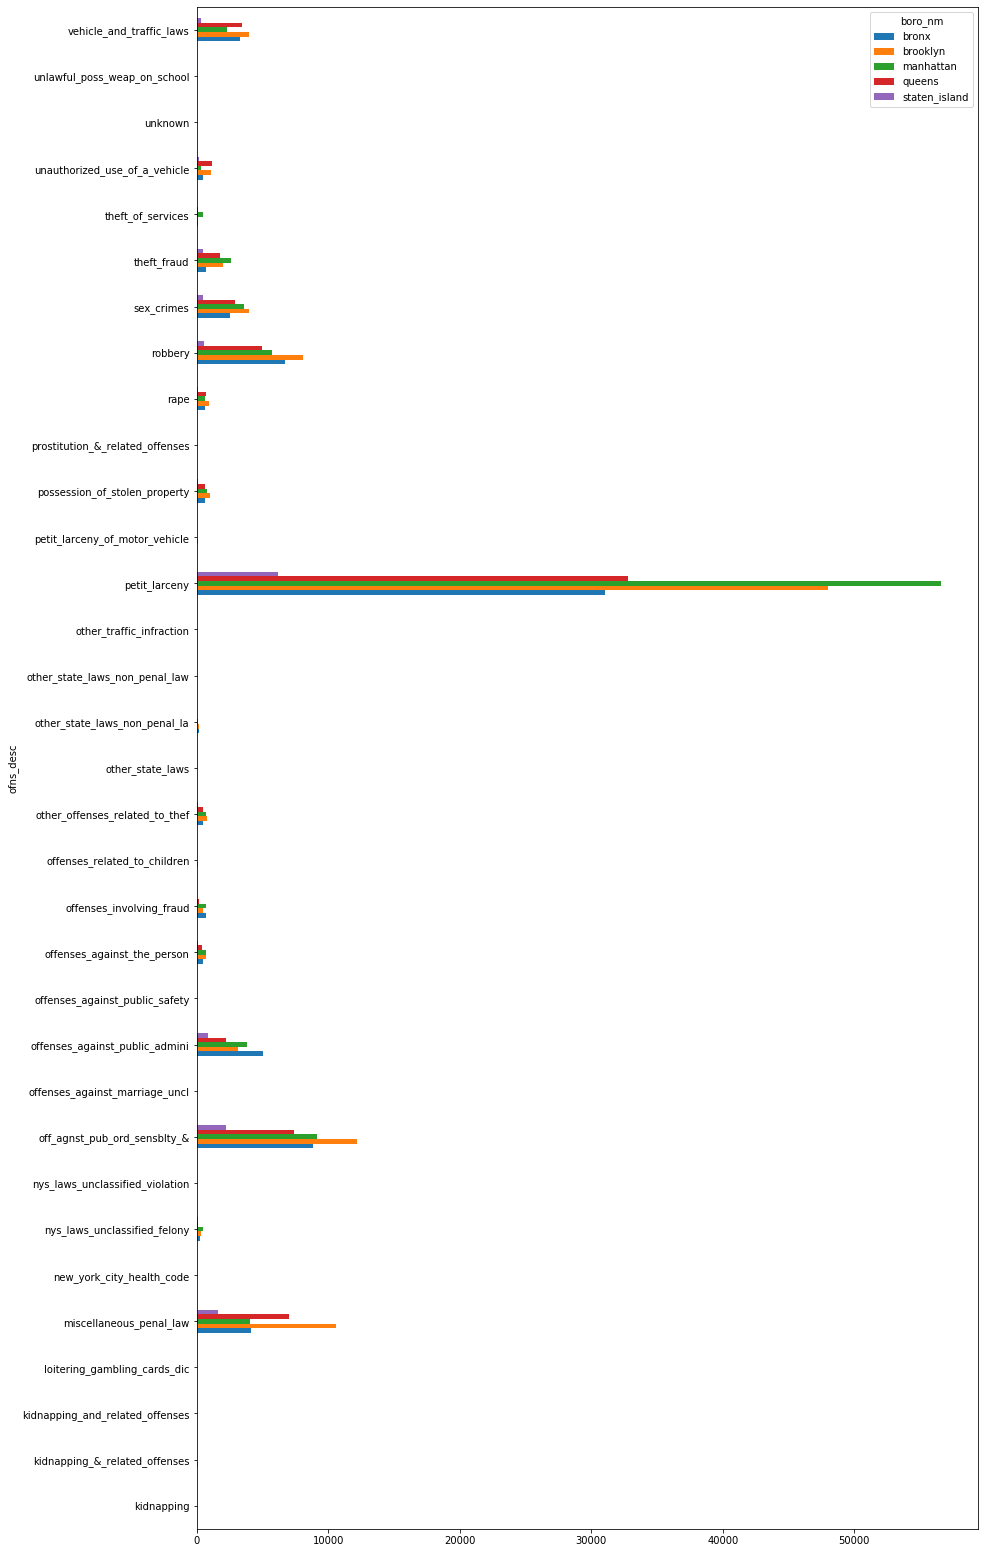

In [20]:
complaints_df[len(complaints_df) // 2:].plot.barh(figsize = (14,28), rot = 0)

In [21]:
df.ofns_desc.nunique(), df.pd_desc.nunique()

(65, 368)

Look at timing of crimes (month, day, week, etc) to see if there are more activities in different districts.

In [4]:
df['dayofweek'] = df.cmplnt_fr_dt.apply(lambda x: x.day_name())

In [5]:
df['month'] = df.cmplnt_fr_dt.apply(lambda x: x.month)

In [24]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,crime_type,crime_num,dayofweek,month
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,petit_larceny,None,Friday,12
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,petit_larceny,None,Wednesday,10
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,petit_larceny,None,Monday,12
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,theft_fraud,None,Monday,9
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,sex_crimes,None,Tuesday,9


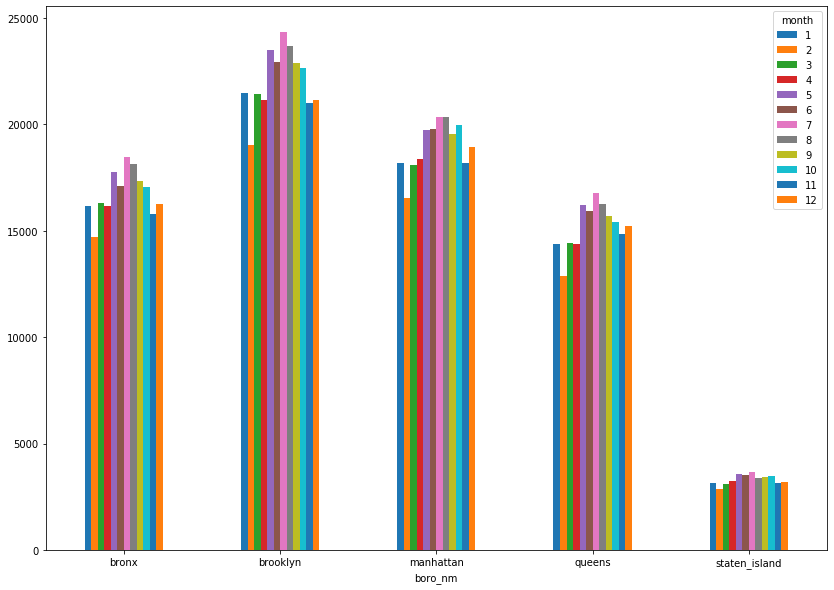

In [25]:
df.groupby(['boro_nm','month']).cmplnt_num.count().unstack().plot.bar(figsize = (14, 10), rot = 0)

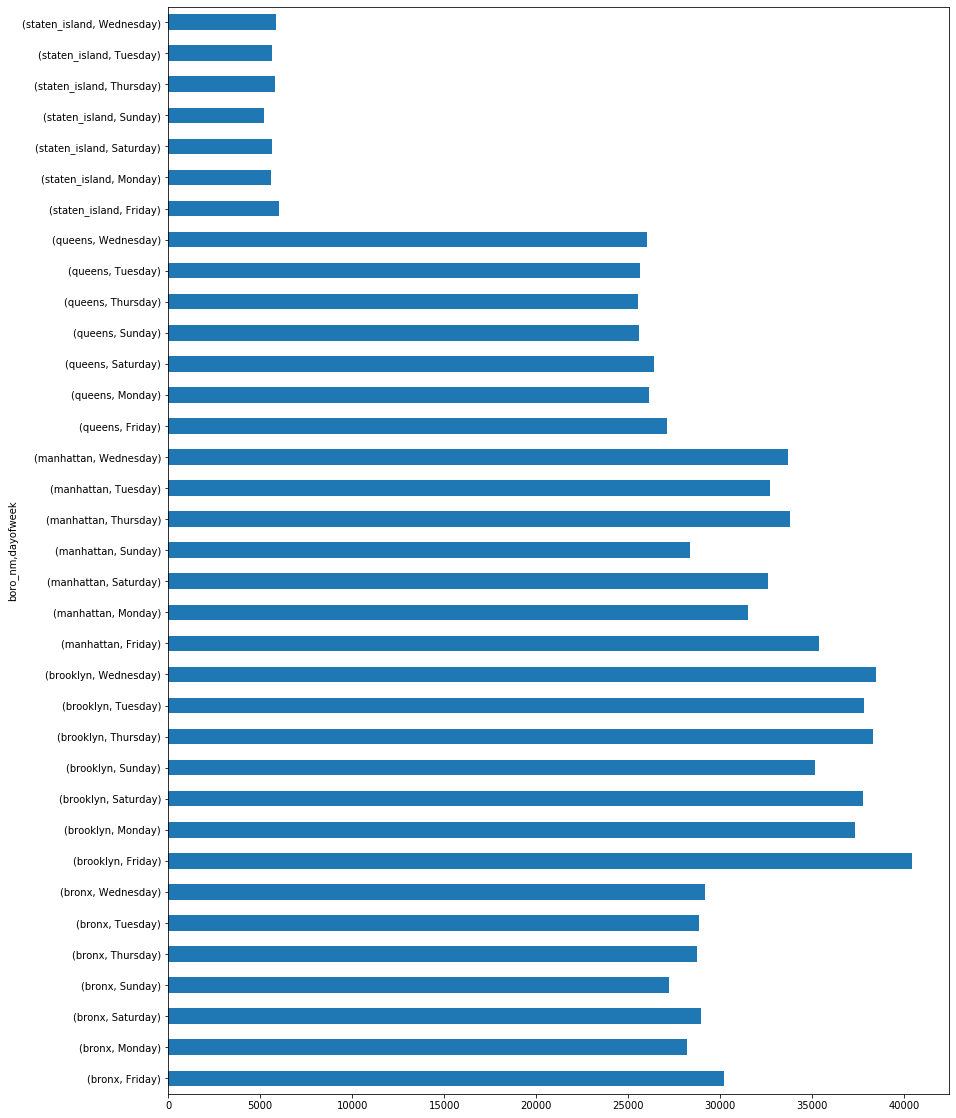

In [26]:
df.groupby(['boro_nm','dayofweek']).cmplnt_num.count().plot.barh(figsize = (14, 20))

In [27]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income',
       'crime_type', 'crime_num', 'dayofweek', 'month'],
      dtype='object')

In [28]:
df.boro_nm.unique()

array(['manhattan', 'queens', 'bronx', 'brooklyn', 'staten_island'],
      dtype=object)

It is important to stipulate that the following is NOT an indicator of who is actually committing more crimes, as these are merely complaints of crime, not necessarily arrests or convictions. 
However, the distribution in the data here might still be useful for modelling purposes.

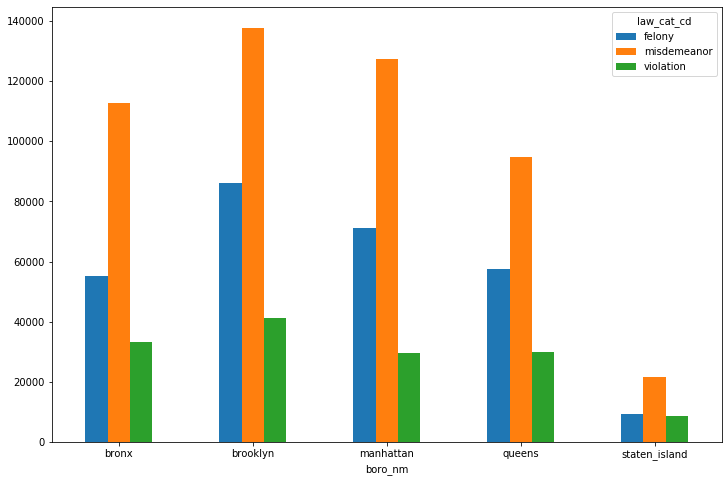

In [29]:
df.groupby(['boro_nm', 'law_cat_cd']).cmplnt_num.count().unstack().plot.bar(figsize = (12, 8), rot = 0);

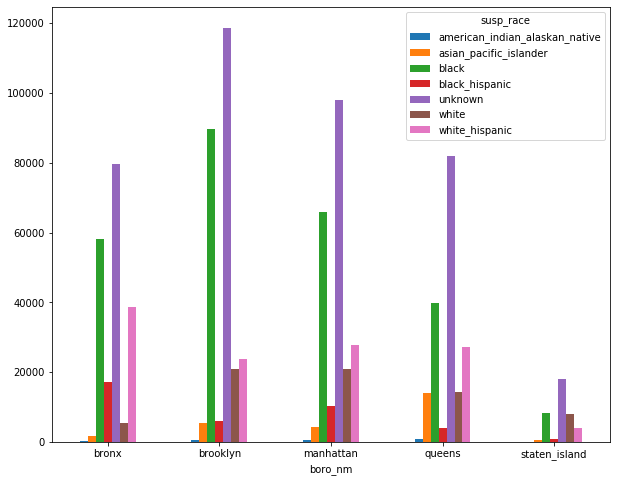

In [30]:
df.groupby(['boro_nm', 'susp_race']).cmplnt_num.count().unstack().plot.bar(figsize = (10, 8), rot = 0);

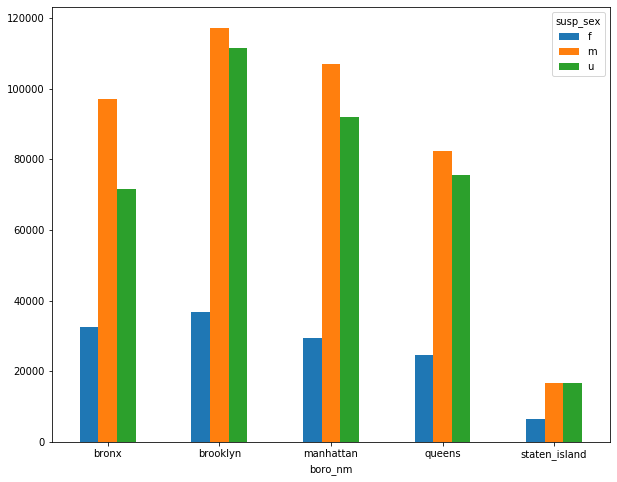

In [31]:
df.groupby(['boro_nm', 'susp_sex']).cmplnt_num.count().unstack().plot.bar(figsize = (10, 8), rot = 0);

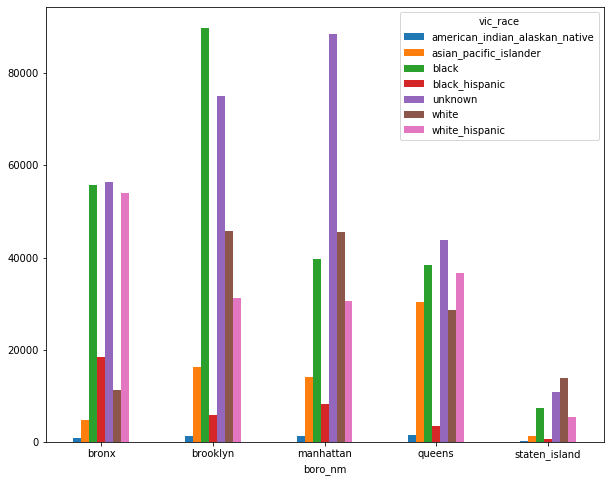

In [32]:
df.groupby(['boro_nm', 'vic_race']).cmplnt_num.count().unstack().plot.bar(figsize = (10, 8), rot = 0);

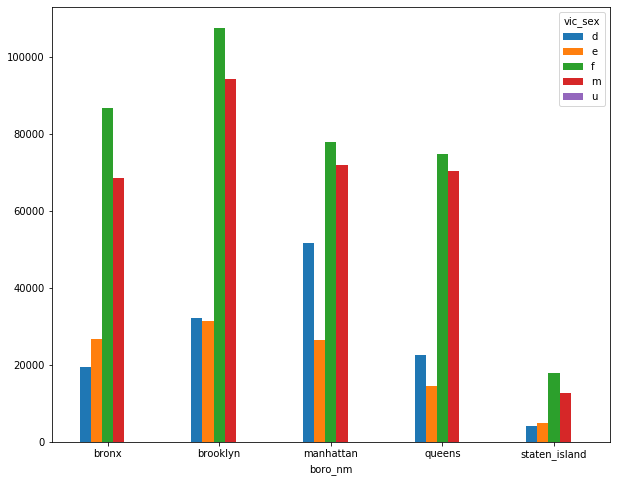

In [33]:
df.groupby(['boro_nm', 'vic_sex']).cmplnt_num.count().unstack().plot.bar(figsize = (10, 8), rot = 0);

Below is less for interpretation, but for a visual of potential signal that can differentiate county location:

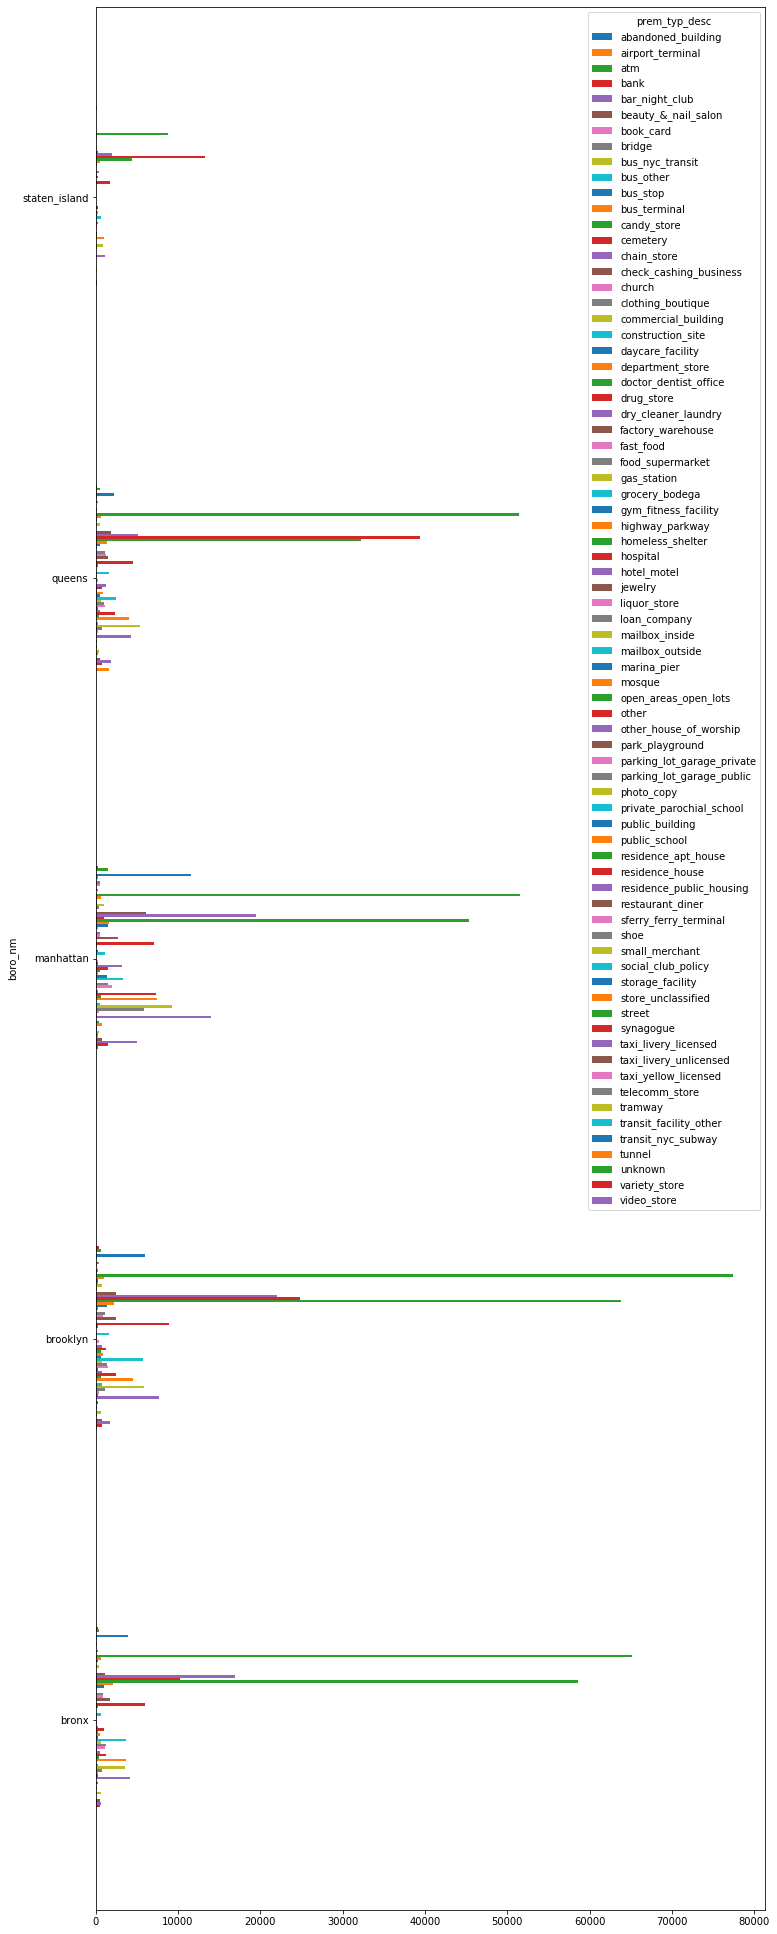

In [34]:
df.groupby(['boro_nm', 'prem_typ_desc']).cmplnt_num.count().unstack().plot.barh(figsize = (12, 35));

## Processing Features
---

In [35]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income',
       'crime_type', 'crime_num', 'dayofweek', 'month'],
      dtype='object')

In [6]:
df.boro_nm.unique()

array(['manhattan', 'queens', 'bronx', 'brooklyn', 'staten_island'],
      dtype=object)

In [7]:
features = ['ofns_desc', 'pd_desc', 'prem_typ_desc', 'susp_race', 'susp_sex', 'vic_race', 'vic_sex', 'dayofweek']
X = df[features]
y = df.boro_nm

In [8]:
coder = LabelEncoder()
coder.fit(y)

y_code = coder.transform(y)

In [9]:
y_code, y

(array([2, 3, 0, ..., 2, 2, 1]), 0         manhattan
 1            queens
 2             bronx
 3          brooklyn
 4             bronx
             ...    
 917451    manhattan
 917452        bronx
 917453    manhattan
 917454    manhattan
 917455     brooklyn
 Name: boro_nm, Length: 916841, dtype: object)

In [37]:
X.shape, y.shape

((916841, 8), (916841,))

In [10]:
#Dummy basically everything, since it's all categorical
X = pd.get_dummies(X, columns = X.columns, drop_first = True)

In [11]:
y.value_counts(normalize = True)


brooklyn         0.289285
manhattan        0.248779
bronx            0.219580
queens           0.198957
staten_island    0.043399
Name: boro_nm, dtype: float64

In [12]:
#No need to scale, everything is binarized.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [13]:
#Evaluation functions to use - get tp, fn, tn and fp from a confusion matrix!
def sensitivity(tp, fn):
    return tp / (tp + fn)

def specificity(tn, fp):
    return tn / (tn + fp)

def precision(tp, fp):
    return tp / (tp + fp)

In [14]:
def make_metrics(model, X_test, y_test, test_preds = None):
    #Neural network models will "predict" probabilities, so I am allowing for that possibility
    if not test_preds: 
        test_preds = model.predict(X_test)
    matrix = confusion_matrix(y_test, test_preds)
    #Building for each class in a multi-class classification model
    bronxtp = matrix[0][0]
    bronxfp = np.sum(matrix[:,0][1:])
    bronxfn = np.sum(matrix[0,:][1:])
    bronxtn = np.sum(matrix) - bronxtp - bronxfp - bronxfn
    
    brooklyntp = matrix[1][1]
    brooklynfp = matrix[0][1] +np.sum(matrix[:,1][2:])
    brooklynfn = matrix[1][0] + np.sum(matrix[1,:][2:])
    brooklyntn = np.sum(matrix) - brooklyntp - brooklynfp - brooklynfn
    
    manhattantp = matrix[2][2]
    manhattanfp = matrix[0][1] + matrix[2][1] + matrix[3][1] + matrix[4][1]
    manhattanfn = matrix[1][0] + matrix[1][2] + matrix[1][3] + matrix[1][4]
    manhattantn = np.sum(matrix) - manhattantp - manhattanfp - manhattanfn
    
    queenstp = matrix[3][3]
    queensfp = np.sum(matrix[:,3][:3]) + matrix[:,3][4]
    queensfn = np.sum(matrix[3,:3]) + matrix[3][4]
    queenstn = np.sum(matrix) - queenstp - queensfp - queensfn
    
    stitp = matrix[4][4]
    stifp = np.sum(matrix[:,4][:4])
    stifn = np.sum(matrix[4,:][:4])
    stitn = np.sum(matrix) - stitp - stifp - stifn
    
    print(f'Metrics for the Bronx with {model}')
    print('----\n')
    print(f'Sensitivity:{sensitivity(bronxtp, bronxfn)}')
    print(f'Specificity:{specificity(bronxtn, bronxfp)}')
    print(f'Precision:{precision(bronxtp, bronxfp)}\n')
    
    print(f'Metrics for Brooklyn with {model}')
    print('----\n')
    print(f'Sensitivity:{sensitivity(brooklyntp, brooklynfn)}')
    print(f'Specificity:{specificity(brooklyntn, brooklynfp)}')
    print(f'Precision:{precision(brooklyntp, brooklynfp)}\n')
    
    print(f'Metrics for Manhattan with {model}')
    print('----\n')
    print(f'Sensitivity:{sensitivity(manhattantp, manhattanfn)}')
    print(f'Specificity:{specificity(manhattantn, manhattanfp)}')
    print(f'Precision:{precision(manhattantp, manhattanfp)}\n')
    
    print(f'Metrics for Queens with {model}')
    print('----\n')
    print(f'Sensitivity:{sensitivity(queenstp, queensfn)}')
    print(f'Specificity:{specificity(queenstn, queensfp)}')
    print(f'Precision:{precision(queenstp, queensfp)}\n')
    
    print(f'Metrics for Staten Island with {model}')
    print('----\n')
    print(f'Sensitivity:{sensitivity(stitp, stifn)}')
    print(f'Specificity:{specificity(stitn, stifp)}')
    print(f'Precision:{precision(stitp, stifp)}\n')

## Logistic Regressor
---

I do not anticipate high performance with a logistic regressor, as it is generally intended for binary classification.

In [159]:
%%time
logreg = LogisticRegression(max_iter = 1000, multi_class = 'multinomial')
logreg.fit(X_train, y_train)

CPU times: user 52min 50s, sys: 3min 48s, total: 56min 38s
Wall time: 16min 16s


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [160]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.4316100228320463, 0.42947328007818125)

In [161]:
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

Text(0.5, 1.0, 'Performance of Logisitic Regression Classifier on Seen Data')

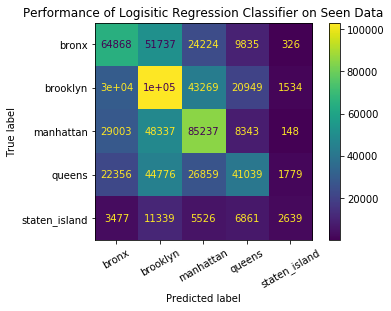

In [163]:
plot_confusion_matrix(logreg, X_train, y_train, xticks_rotation = 30)
plt.title('Performance of Logisitic Regression Classifier on Seen Data')

Text(0.5, 1.0, 'Performance of Logistic Regression Classifier on Unseen Data')

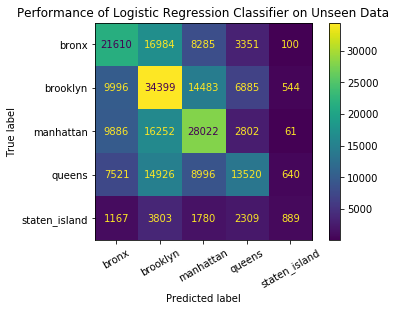

In [164]:
plot_confusion_matrix(logreg, X_test, y_test, xticks_rotation = 30)
plt.title('Performance of Logistic Regression Classifier on Unseen Data')

In [165]:
make_metrics(logreg, X_test, y_test)

Metrics for the Bronx with LogisticRegression(max_iter=1000, multi_class='multinomial')
----

Sensitivity:0.4293661831909398
Specificity:0.8402848821283423
Precision:0.4306496612196094

Metrics for Brooklyn with LogisticRegression(max_iter=1000, multi_class='multinomial')
----

Sensitivity:0.518783838810382
Specificity:0.6810084466925306
Precision:0.398302533463017

Metrics for Manhattan with LogisticRegression(max_iter=1000, multi_class='multinomial')
----

Sensitivity:0.4675788419823127
Specificity:0.6930252066091293
Precision:0.3503319289384525

Metrics for Queens with LogisticRegression(max_iter=1000, multi_class='multinomial')
----

Sensitivity:0.2964717233515339
Specificity:0.9164143174589342
Precision:0.4683548688814217

Metrics for Staten Island with LogisticRegression(max_iter=1000, multi_class='multinomial')
----

Sensitivity:0.08936469642139123
Specificity:0.9938658141136444
Precision:0.39794091316025065



## Random Forest
---

In [45]:
rf = RandomForestClassifier(n_estimators = 125, min_samples_leaf = 25)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=25, n_estimators=125)

In [46]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.4387955732007039, 0.4342156353752656)

In [71]:
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

Text(0.5, 1.0, 'Performance of Random Forest Classifier on Seen Data')

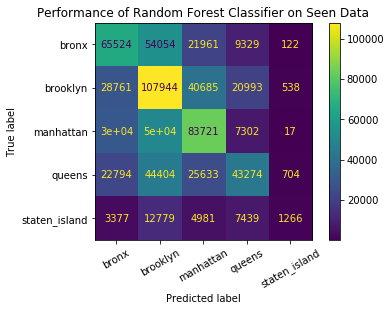

In [74]:
plot_confusion_matrix(rf, X_train, y_train, xticks_rotation = 30)
plt.title('Performance of Random Forest Classifier on Seen Data')

Text(0.5, 1.0, 'Performance of Random Forest Classifier on Unseen Data')

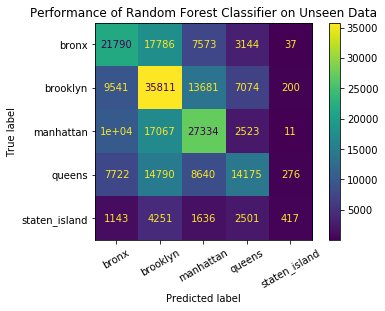

In [75]:
plot_confusion_matrix(rf, X_test, y_test, xticks_rotation = 30)
plt.title('Performance of Random Forest Classifier on Unseen Data')

In [157]:
make_metrics(rf, X_test, y_test)

Metrics for the Bronx with RandomForestClassifier(min_samples_leaf=25, n_estimators=125)
----

Sensitivity:0.43294257897874033
Specificity:0.8407097455850537
Precision:0.43333863654442767

Metrics for Brooklyn with RandomForestClassifier(min_samples_leaf=25, n_estimators=125)
----

Sensitivity:0.5400787247198636
Specificity:0.6691671168295438
Precision:0.39920851680508335

Metrics for Manhattan with RandomForestClassifier(min_samples_leaf=25, n_estimators=125)
----

Sensitivity:0.4726612484869445
Specificity:0.6855310682047602
Precision:0.33650957797803716

Metrics for Queens with RandomForestClassifier(min_samples_leaf=25, n_estimators=125)
----

Sensitivity:0.3108348134991119
Specificity:0.916986187965666
Precision:0.4818642281673862

Metrics for Staten Island with RandomForestClassifier(min_samples_leaf=25, n_estimators=125)
----

Sensitivity:0.04191797346200241
Specificity:0.9976101759074718
Precision:0.44314558979808716



In [167]:
y.nunique()

5

## Neural Network
---

In [231]:
X_test.values.shape

(229211, 529)

In [16]:
y_train_code = coder.transform(y_train)
y_test_code = coder.transform(y_test)

In [17]:
y_train_code = to_categorical(y_train_code, 5)
y_test_code = to_categorical(y_test_code, 5)

In [18]:
y_test_code.shape, X_test.shape

((229211, 5), (229211, 529))

In [22]:
model = Sequential()

model.add(Dense(8000, activation = 'relu', kernel_regularizer = l2(0.002), input_dim = 529))

model.add(Dense(4000, activation = 'relu', kernel_regularizer = l2(0.002)))

model.add(Dense(2000, activation = 'relu', kernel_regularizer = l2(0.002)))

#model.add(Dense(1000, activation = 'relu', kernel_regularizer = l2(0.005)))

model.add(Dense(500, activation = 'relu', kernel_regularizer = l2(0.002)))

model.add(Dense(250, activation = 'relu', kernel_regularizer = l2(0.002)))

model.add(Dense(70, activation = 'relu', kernel_regularizer = l2(0.002)))

model.add(Dense(5, activation = 'softmax', kernel_regularizer = l2(0.002)))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
result = model.fit(X_train.values, y_train_code, batch_size = 2500, validation_data = (X_test.values, y_test_code), epochs = 15)

Epoch 1/15
276/276 [==============================] - 842s 3s/step - loss: 2.1758 - accuracy: 0.3932 - val_loss: 1.4281 - val_accuracy: 0.4192
Epoch 2/15
276/276 [==============================] - 833s 3s/step - loss: 1.4188 - accuracy: 0.4203 - val_loss: 1.4066 - val_accuracy: 0.4261
Epoch 3/15
276/276 [==============================] - 846s 3s/step - loss: 1.4063 - accuracy: 0.4235 - val_loss: 1.4046 - val_accuracy: 0.4225
Epoch 4/15
276/276 [==============================] - 814s 3s/step - loss: 1.4014 - accuracy: 0.4251 - val_loss: 1.4077 - val_accuracy: 0.4206
Epoch 5/15
276/276 [==============================] - 816s 3s/step - loss: 1.3993 - accuracy: 0.4255 - val_loss: 1.3988 - val_accuracy: 0.4246
Epoch 6/15
276/276 [==============================] - 794s 3s/step - loss: 1.3968 - accuracy: 0.4269 - val_loss: 1.3957 - val_accuracy: 0.4267
Epoch 7/15
276/276 [==============================] - 823s 3s/step - loss: 1.3950 - accuracy: 0.4273 - val_loss: 1.4051 - val_accuracy: 0.4219